In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import os
import matplotlib.ticker as ticker
import dateparser
from scipy.interpolate import make_interp_spline

In [ ]:
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)  

In [3]:
products_times_and_labels_path = os.path.join(os.path.expanduser("~"), "Desktop\\TrendyolMilla\\04_Data_Time_Series\\Data", "product_periodic_group_sentiment.csv") 

df_product_periodic_group_sentiment = pd.read_csv(products_times_and_labels_path)

df_product_periodic_group_sentiment.head()

,Ürün Adı,Yıl_Ay_Min,Yıl_Ay_Max,Olumlu Yorum Sayısı,Toplam Yorum Sayısı,Olumlu Oranı
0,Edit by Trendyol Siyah Vücuda Oturan Asimetrik Yaka Örme Kısa Elbise TEDAW25EL00006,2024-08,2024-10,9,13,0.692308
1,Edit by Trendyol Siyah Vücuda Oturan Asimetrik Yaka Örme Kısa Elbise TEDAW25EL00006,2024-11,2025-01,44,62,0.709677
2,Edit by Trendyol Siyah Vücuda Oturan Asimetrik Yaka Örme Kısa Elbise TEDAW25EL00006,2025-02,2025-03,9,15,0.600000
3,TRENDYOLMİLLA Altın Vücuda Oturan Parıltılı Örme Pullu Payet Kısa Şık Abiye Elbise TPRAW24EL00159,2023-09,2023-11,25,28,0.892857
4,TRENDYOLMİLLA Altın Vücuda Oturan Parıltılı Örme Pullu Payet Kısa Şık Abiye Elbise TPRAW24EL00159,2023-12,2024-02,8,9,0.888889


In [4]:
df_product_periodic_group_sentiment[df_product_periodic_group_sentiment['Ürün Adı']=='Trendyol Curve Çok Renkli A-line Çiçek Desenli V Yaka Örme Büyük Beden Elbise TBBSS22AH00010']

,Ürün Adı,Yıl_Ay_Min,Yıl_Ay_Max,Olumlu Yorum Sayısı,Toplam Yorum Sayısı,Olumlu Oranı
3474,Trendyol Curve Çok Renkli A-line Çiçek Desenli V Yaka Örme Büyük Beden Elbise TBBSS22AH00010,2022-04,2022-06,95,95,1.000000
3475,Trendyol Curve Çok Renkli A-line Çiçek Desenli V Yaka Örme Büyük Beden Elbise TBBSS22AH00010,2022-07,2022-09,29,30,0.966667
3476,Trendyol Curve Çok Renkli A-line Çiçek Desenli V Yaka Örme Büyük Beden Elbise TBBSS22AH00010,2022-10,2022-12,8,8,1.000000
3477,Trendyol Curve Çok Renkli A-line Çiçek Desenli V Yaka Örme Büyük Beden Elbise TBBSS22AH00010,2023-01,2023-03,3,3,1.000000
3478,Trendyol Curve Çok Renkli A-line Çiçek Desenli V Yaka Örme Büyük Beden Elbise TBBSS22AH00010,2023-04,2023-06,39,40,0.975000
3479,Trendyol Curve Çok Renkli A-line Çiçek Desenli V Yaka Örme Büyük Beden Elbise TBBSS22AH00010,2023-07,2023-09,19,19,1.000000
3480,Trendyol Curve Çok Renkli A-line Çiçek Desenli V Yaka Örme Büyük Beden Elbise TBBSS22AH00010,2023-11,2024-06,9,10,0.900000
3481,Trendyol Curve Çok Renkli A-line Çiçek Desenli V Yaka Örme Büyük Beden Elbise TBBSS22AH00010,2024-07,2024-11,7,8,0.875000
3482,Trendyol Curve Çok Renkli A-line Çiçek Desenli V Yaka Örme Büyük Beden Elbise TBBSS22AH00010,2024-12,2025-02,14,17,0.823529
3483,Trendyol Curve Çok Renkli A-line Çiçek Desenli V Yaka Örme Büyük Beden Elbise TBBSS22AH00010,2025-03,2025-03,0,1,0.000000


In [ ]:
def merge_single_periods(df):

    result_dfs = []

    for product, group in df.groupby('Ürün Adı'):
        group = group.sort_values('Yıl_Ay_Min').reset_index(drop=True)

        single_period_idx = group[group['Yıl_Ay_Min'] == group['Yıl_Ay_Max']].index

        for idx in single_period_idx:
            if idx == 0:

                continue

            prev_idx = idx - 1

            group.loc[prev_idx, 'Yıl_Ay_Max'] = group.loc[idx, 'Yıl_Ay_Max']

            group.loc[prev_idx, 'Olumlu Yorum Sayısı'] += group.loc[idx, 'Olumlu Yorum Sayısı']
            group.loc[prev_idx, 'Toplam Yorum Sayısı'] += group.loc[idx, 'Toplam Yorum Sayısı']

            group.loc[prev_idx, 'Olumlu Oranı'] = (
                group.loc[prev_idx, 'Olumlu Yorum Sayısı'] / group.loc[prev_idx, 'Toplam Yorum Sayısı']
                if group.loc[prev_idx, 'Toplam Yorum Sayısı'] > 0 else 0
            )

        group = group.drop(single_period_idx)

        result_dfs.append(group)

    merged_df = pd.concat(result_dfs).reset_index(drop=True)
    return merged_df

df_product_periodic_group_sentiment = merge_single_periods(df_product_periodic_group_sentiment)


In [6]:
df_product_periodic_group_sentiment[df_product_periodic_group_sentiment['Ürün Adı']=='Trendyol Curve Çok Renkli A-line Çiçek Desenli V Yaka Örme Büyük Beden Elbise TBBSS22AH00010']

,Ürün Adı,Yıl_Ay_Min,Yıl_Ay_Max,Olumlu Yorum Sayısı,Toplam Yorum Sayısı,Olumlu Oranı
3299,Trendyol Curve Çok Renkli A-line Çiçek Desenli V Yaka Örme Büyük Beden Elbise TBBSS22AH00010,2022-04,2022-06,95,95,1.000000
3300,Trendyol Curve Çok Renkli A-line Çiçek Desenli V Yaka Örme Büyük Beden Elbise TBBSS22AH00010,2022-07,2022-09,29,30,0.966667
3301,Trendyol Curve Çok Renkli A-line Çiçek Desenli V Yaka Örme Büyük Beden Elbise TBBSS22AH00010,2022-10,2022-12,8,8,1.000000
3302,Trendyol Curve Çok Renkli A-line Çiçek Desenli V Yaka Örme Büyük Beden Elbise TBBSS22AH00010,2023-01,2023-03,3,3,1.000000
3303,Trendyol Curve Çok Renkli A-line Çiçek Desenli V Yaka Örme Büyük Beden Elbise TBBSS22AH00010,2023-04,2023-06,39,40,0.975000
3304,Trendyol Curve Çok Renkli A-line Çiçek Desenli V Yaka Örme Büyük Beden Elbise TBBSS22AH00010,2023-07,2023-09,19,19,1.000000
3305,Trendyol Curve Çok Renkli A-line Çiçek Desenli V Yaka Örme Büyük Beden Elbise TBBSS22AH00010,2023-11,2024-06,9,10,0.900000
3306,Trendyol Curve Çok Renkli A-line Çiçek Desenli V Yaka Örme Büyük Beden Elbise TBBSS22AH00010,2024-07,2024-11,7,8,0.875000
3307,Trendyol Curve Çok Renkli A-line Çiçek Desenli V Yaka Örme Büyük Beden Elbise TBBSS22AH00010,2024-12,2025-03,14,18,0.777778


In [ ]:
trend_data = []

for product, group in df_product_periodic_group_sentiment.groupby('Ürün Adı'):

    group_sorted = group.sort_values(by='Yıl_Ay_Min')


    first_score = group_sorted.iloc[0]['Olumlu Oranı']
    last_score = group_sorted.iloc[-1]['Olumlu Oranı']


    trend_diff = last_score - first_score


    trend_data.append({
        'Ürün Adı': product,
        'İlk Dönem': group_sorted.iloc[0]['Yıl_Ay_Min'],
        'Son Dönem': group_sorted.iloc[-1]['Yıl_Ay_Max'],
        'İlk Skor': round(first_score, 6),
        'Son Skor': round(last_score, 6),
        'Değişim': round(trend_diff, 6)
    })


df_trend_diff = pd.DataFrame(trend_data)


df_trend_diff.head()


,Ürün Adı,İlk Dönem,Son Dönem,İlk Skor,Son Skor,Değişim
0,Edit by Trendyol Siyah Vücuda Oturan Asimetrik Yaka Örme Kısa Elbise TEDAW25EL00006,2024-08,2025-03,0.692308,0.600000,-0.092308
1,TRENDYOLMİLLA Altın Vücuda Oturan Parıltılı Örme Pullu Payet Kısa Şık Abiye Elbise TPRAW24EL00159,2023-09,2025-02,0.892857,0.846154,-0.046703
2,TRENDYOLMİLLA Altın Vücuda Oturan Örme Parıltılı Pullu Örme Payet Şık Abiye Elbise TPRSS24EL00030,2024-03,2025-03,0.850000,0.842105,-0.007895
3,TRENDYOLMİLLA Antrasit A Kesim Eteği Asimetrik Mini Dokuma Elbise TWOAW24EL00496,2023-08,2025-02,0.428571,0.666667,0.238095
4,TRENDYOLMİLLA Antrasit Askılı Mini Dokuma Jile Elbise TWOAW21EL1163,2022-04,2025-02,1.000000,0.333333,-0.666667


In [8]:
df_trend_diff['Mutlak_Değişim'] = df_trend_diff['Değişim'].abs()
df_trend_diff = df_trend_diff.sort_values(by='Mutlak_Değişim', ascending=False)
df_trend_diff.head(10)

,Ürün Adı,İlk Dönem,Son Dönem,İlk Skor,Son Skor,Değişim,Mutlak_Değişim
293,TRENDYOLMİLLA Siyah Kruvaze Bağlama Detaylı Mini Mono Desenli Dokuma Elbise TWOAW24EL00488,2023-09,2025-02,0.944444,0.000000,-0.944444,0.944444
268,TRENDYOLMİLLA Siyah Düğme Detaylı Mini Dokuma Ceket Elbise TWOSS20EL0407,2022-03,2025-01,0.923077,0.250000,-0.673077,0.673077
54,TRENDYOLMİLLA Ekru Mini Dokuma Ekose Desenli Jile Elbise TWOAW20EL0208,2022-03,2025-03,1.000000,0.333333,-0.666667,0.666667
461,Trendyol Curve Mavi Dokuma Beli Lastik ve Düğme Detaylı Elbise TBBSS22EL1563,2023-01,2025-01,0.333333,1.000000,0.666667,0.666667
4,TRENDYOLMİLLA Antrasit Askılı Mini Dokuma Jile Elbise TWOAW21EL1163,2022-04,2025-02,1.000000,0.333333,-0.666667,0.666667
74,TRENDYOLMİLLA Haki Gömlek Yaka Dokuma Elbise TWOAW21EL1964,2022-03,2025-02,0.863636,0.200000,-0.663636,0.663636
451,Trendyol Curve Kahverengi Büzgü Detaylı Midi Örme Elbise TBBSS24AH00080,2024-03,2025-03,0.400000,1.000000,0.600000,0.600000
402,TRENDYOLMİLLA Zümrüt A Kesim Yeşili Eteği Volanlı Saten Dokuma Elbise TWOAW21EL1891,2023-09,2025-02,0.911765,0.333333,-0.578431,0.578431
178,TRENDYOLMİLLA Mavi Çiçek Desenli A Kesim Volanlı Astarlı Midi Dokuma Elbise TWOSS20EL0894,2023-04,2024-12,0.876712,0.400000,-0.476712,0.476712
272,TRENDYOLMİLLA Siyah Eteği Volanlı A Kesim Şifon Midi Astarlı Dokuma Elbise TWOSS22EL00733,2022-05,2024-08,0.975000,0.500000,-0.475000,0.475000


In [9]:
df_product_periodic_group_sentiment[df_product_periodic_group_sentiment['Ürün Adı']=='TRENDYOLMİLLA Siyah Kruvaze Bağlama Detaylı Mini Mono Desenli Dokuma Elbise TWOAW24EL00488']

,Ürün Adı,Yıl_Ay_Min,Yıl_Ay_Max,Olumlu Yorum Sayısı,Toplam Yorum Sayısı,Olumlu Oranı
1831,TRENDYOLMİLLA Siyah Kruvaze Bağlama Detaylı Mini Mono Desenli Dokuma Elbise TWOAW24EL00488,2023-09,2023-11,17,18,0.944444
1832,TRENDYOLMİLLA Siyah Kruvaze Bağlama Detaylı Mini Mono Desenli Dokuma Elbise TWOAW24EL00488,2023-12,2024-02,25,30,0.833333
1833,TRENDYOLMİLLA Siyah Kruvaze Bağlama Detaylı Mini Mono Desenli Dokuma Elbise TWOAW24EL00488,2024-03,2024-05,8,11,0.727273
1834,TRENDYOLMİLLA Siyah Kruvaze Bağlama Detaylı Mini Mono Desenli Dokuma Elbise TWOAW24EL00488,2024-06,2024-09,7,7,1.000000
1835,TRENDYOLMİLLA Siyah Kruvaze Bağlama Detaylı Mini Mono Desenli Dokuma Elbise TWOAW24EL00488,2024-10,2024-12,7,9,0.777778
1836,TRENDYOLMİLLA Siyah Kruvaze Bağlama Detaylı Mini Mono Desenli Dokuma Elbise TWOAW24EL00488,2025-01,2025-02,0,2,0.000000


In [10]:
df_product_periodic_group_sentiment[df_product_periodic_group_sentiment['Ürün Adı']=='TRENDYOLMİLLA Siyah Düğme Detaylı Mini Dokuma Ceket Elbise TWOSS20EL0407']

,Ürün Adı,Yıl_Ay_Min,Yıl_Ay_Max,Olumlu Yorum Sayısı,Toplam Yorum Sayısı,Olumlu Oranı
1648,TRENDYOLMİLLA Siyah Düğme Detaylı Mini Dokuma Ceket Elbise TWOSS20EL0407,2022-03,2022-05,12,13,0.923077
1649,TRENDYOLMİLLA Siyah Düğme Detaylı Mini Dokuma Ceket Elbise TWOSS20EL0407,2022-06,2022-08,31,36,0.861111
1650,TRENDYOLMİLLA Siyah Düğme Detaylı Mini Dokuma Ceket Elbise TWOSS20EL0407,2022-09,2022-11,55,66,0.833333
1651,TRENDYOLMİLLA Siyah Düğme Detaylı Mini Dokuma Ceket Elbise TWOSS20EL0407,2022-12,2023-02,20,25,0.800000
1652,TRENDYOLMİLLA Siyah Düğme Detaylı Mini Dokuma Ceket Elbise TWOSS20EL0407,2023-03,2023-05,34,40,0.850000
1653,TRENDYOLMİLLA Siyah Düğme Detaylı Mini Dokuma Ceket Elbise TWOSS20EL0407,2023-06,2023-08,11,14,0.785714
1654,TRENDYOLMİLLA Siyah Düğme Detaylı Mini Dokuma Ceket Elbise TWOSS20EL0407,2023-09,2023-11,7,9,0.777778
1655,TRENDYOLMİLLA Siyah Düğme Detaylı Mini Dokuma Ceket Elbise TWOSS20EL0407,2023-12,2024-03,3,3,1.000000
1656,TRENDYOLMİLLA Siyah Düğme Detaylı Mini Dokuma Ceket Elbise TWOSS20EL0407,2024-04,2024-06,8,9,0.888889
1657,TRENDYOLMİLLA Siyah Düğme Detaylı Mini Dokuma Ceket Elbise TWOSS20EL0407,2024-07,2025-01,1,4,0.250000


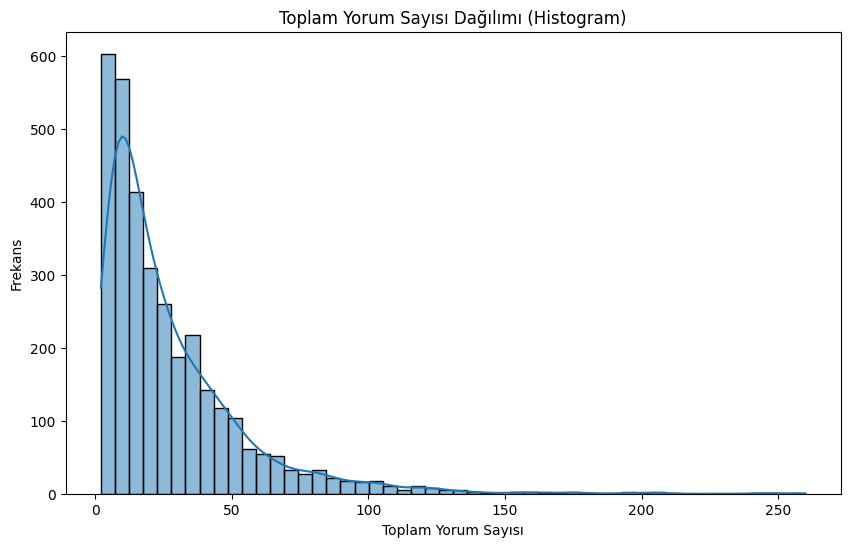

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(df_product_periodic_group_sentiment['Toplam Yorum Sayısı'], bins=50, kde=True)
plt.title('Toplam Yorum Sayısı Dağılımı (Histogram)')
plt.xlabel('Toplam Yorum Sayısı')
plt.ylabel('Frekans')
plt.show()

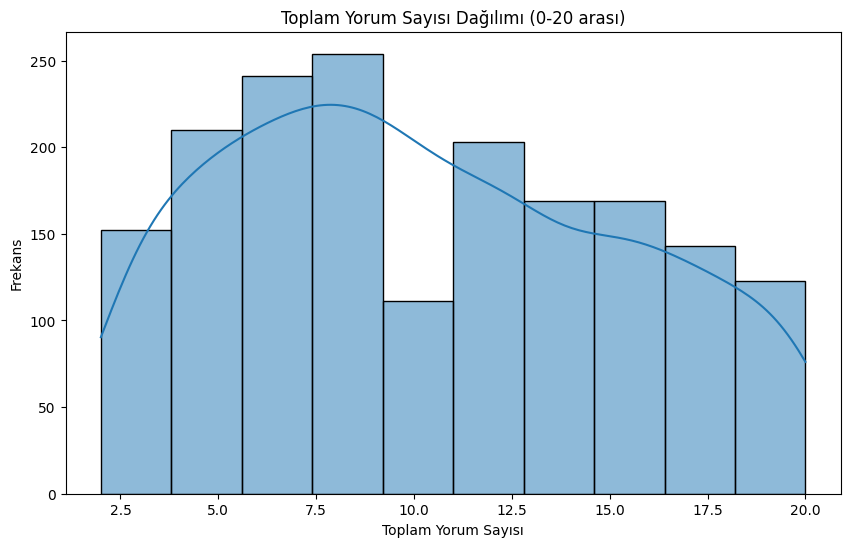

In [12]:
df_small_counts = df_product_periodic_group_sentiment[df_product_periodic_group_sentiment['Toplam Yorum Sayısı'] <= 20]


plt.figure(figsize=(10,6))
sns.histplot(df_small_counts['Toplam Yorum Sayısı'], bins=10, kde=True)
plt.title('Toplam Yorum Sayısı Dağılımı (0-20 arası)')
plt.xlabel('Toplam Yorum Sayısı')
plt.ylabel('Frekans')
plt.show()


In [13]:
def merge_periods_product_level(df, threshold=10):
    df = df.copy()
    df['Yıl_Ay_Min'] = pd.to_datetime(df['Yıl_Ay_Min'])
    df['Yıl_Ay_Max'] = pd.to_datetime(df['Yıl_Ay_Max'])

    result = []

    for product, group in df.groupby('Ürün Adı'):
        group = group.sort_values('Yıl_Ay_Min').reset_index(drop=True)
        merged = []
        current = group.iloc[-1].to_dict()

        for i in range(len(group)-2, -1, -1):
            prev = group.iloc[i].to_dict()

            if current['Toplam Yorum Sayısı'] < threshold:
                current['Toplam Yorum Sayısı'] += prev['Toplam Yorum Sayısı']
                current['Olumlu Yorum Sayısı'] += prev['Olumlu Yorum Sayısı']
                current['Olumlu Oranı'] = current['Olumlu Yorum Sayısı'] / current['Toplam Yorum Sayısı'] if current['Toplam Yorum Sayısı'] > 0 else 0
                current['Yıl_Ay_Min'] = prev['Yıl_Ay_Min']
            else:
                merged.append(current)
                current = prev

        merged.append(current)
        merged.reverse()
        result.append(pd.DataFrame(merged))

    final_df = pd.concat(result).reset_index(drop=True)
    final_df['Yıl_Ay_Min'] = final_df['Yıl_Ay_Min'].dt.strftime('%Y-%m')
    final_df['Yıl_Ay_Max'] = final_df['Yıl_Ay_Max'].dt.strftime('%Y-%m')

    return final_df


In [14]:
df_merged = merge_periods_product_level(df_product_periodic_group_sentiment)
df_merged.head()

,Ürün Adı,Yıl_Ay_Min,Yıl_Ay_Max,Olumlu Yorum Sayısı,Toplam Yorum Sayısı,Olumlu Oranı
0,Edit by Trendyol Siyah Vücuda Oturan Asimetrik Yaka Örme Kısa Elbise TEDAW25EL00006,2024-08,2024-10,9,13,0.692308
1,Edit by Trendyol Siyah Vücuda Oturan Asimetrik Yaka Örme Kısa Elbise TEDAW25EL00006,2024-11,2025-01,44,62,0.709677
2,Edit by Trendyol Siyah Vücuda Oturan Asimetrik Yaka Örme Kısa Elbise TEDAW25EL00006,2025-02,2025-03,9,15,0.600000
3,TRENDYOLMİLLA Altın Vücuda Oturan Parıltılı Örme Pullu Payet Kısa Şık Abiye Elbise TPRAW24EL00159,2023-09,2024-02,33,37,0.891892
4,TRENDYOLMİLLA Altın Vücuda Oturan Parıltılı Örme Pullu Payet Kısa Şık Abiye Elbise TPRAW24EL00159,2024-03,2024-09,10,12,0.833333


In [15]:
df_merged[df_merged['Ürün Adı']=='TRENDYOLMİLLA Siyah Kruvaze Bağlama Detaylı Mini Mono Desenli Dokuma Elbise TWOAW24EL00488']

,Ürün Adı,Yıl_Ay_Min,Yıl_Ay_Max,Olumlu Yorum Sayısı,Toplam Yorum Sayısı,Olumlu Oranı
1482,TRENDYOLMİLLA Siyah Kruvaze Bağlama Detaylı Mini Mono Desenli Dokuma Elbise TWOAW24EL00488,2023-09,2023-11,17,18,0.944444
1483,TRENDYOLMİLLA Siyah Kruvaze Bağlama Detaylı Mini Mono Desenli Dokuma Elbise TWOAW24EL00488,2023-12,2024-02,25,30,0.833333
1484,TRENDYOLMİLLA Siyah Kruvaze Bağlama Detaylı Mini Mono Desenli Dokuma Elbise TWOAW24EL00488,2024-03,2024-09,15,18,0.833333
1485,TRENDYOLMİLLA Siyah Kruvaze Bağlama Detaylı Mini Mono Desenli Dokuma Elbise TWOAW24EL00488,2024-10,2025-02,7,11,0.636364


In [16]:
df_merged[df_merged['Ürün Adı']=='TRENDYOLMİLLA Siyah Düğme Detaylı Mini Dokuma Ceket Elbise TWOSS20EL0407']

,Ürün Adı,Yıl_Ay_Min,Yıl_Ay_Max,Olumlu Yorum Sayısı,Toplam Yorum Sayısı,Olumlu Oranı
1338,TRENDYOLMİLLA Siyah Düğme Detaylı Mini Dokuma Ceket Elbise TWOSS20EL0407,2022-03,2022-05,12,13,0.923077
1339,TRENDYOLMİLLA Siyah Düğme Detaylı Mini Dokuma Ceket Elbise TWOSS20EL0407,2022-06,2022-08,31,36,0.861111
1340,TRENDYOLMİLLA Siyah Düğme Detaylı Mini Dokuma Ceket Elbise TWOSS20EL0407,2022-09,2022-11,55,66,0.833333
1341,TRENDYOLMİLLA Siyah Düğme Detaylı Mini Dokuma Ceket Elbise TWOSS20EL0407,2022-12,2023-02,20,25,0.800000
1342,TRENDYOLMİLLA Siyah Düğme Detaylı Mini Dokuma Ceket Elbise TWOSS20EL0407,2023-03,2023-05,34,40,0.850000
1343,TRENDYOLMİLLA Siyah Düğme Detaylı Mini Dokuma Ceket Elbise TWOSS20EL0407,2023-06,2023-08,11,14,0.785714
1344,TRENDYOLMİLLA Siyah Düğme Detaylı Mini Dokuma Ceket Elbise TWOSS20EL0407,2023-09,2024-03,10,12,0.833333
1345,TRENDYOLMİLLA Siyah Düğme Detaylı Mini Dokuma Ceket Elbise TWOSS20EL0407,2024-04,2025-01,9,13,0.692308


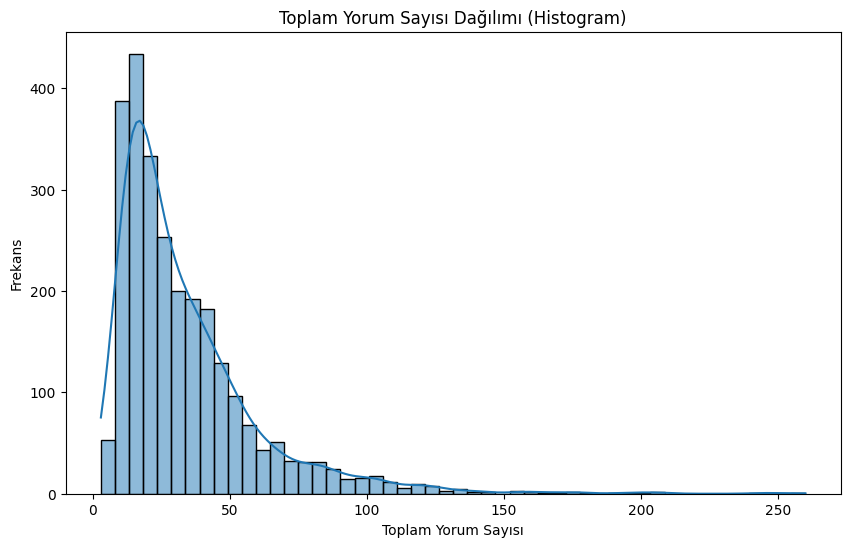

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(df_merged['Toplam Yorum Sayısı'], bins=50, kde=True)
plt.title('Toplam Yorum Sayısı Dağılımı (Histogram)')
plt.xlabel('Toplam Yorum Sayısı')
plt.ylabel('Frekans')
plt.show()

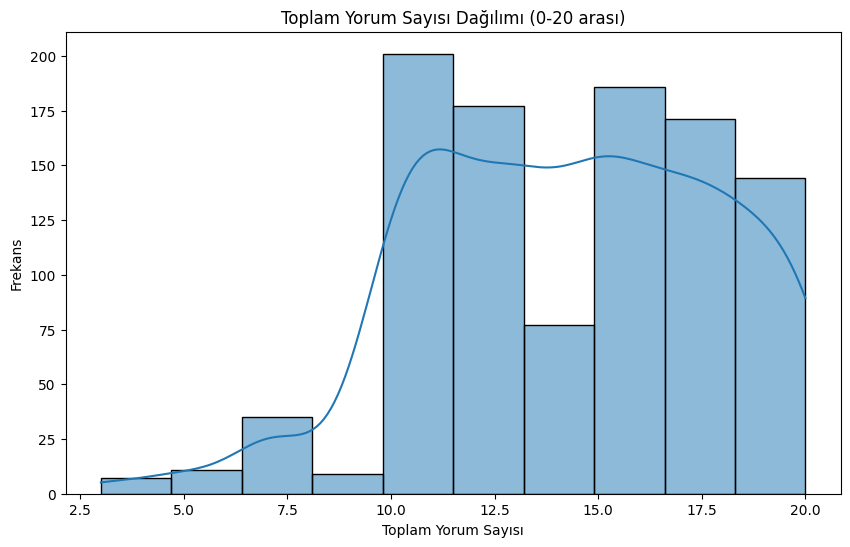

In [18]:
df_small_counts = df_merged[df_merged['Toplam Yorum Sayısı'] <= 20]

plt.figure(figsize=(10,6))
sns.histplot(df_small_counts['Toplam Yorum Sayısı'], bins=10, kde=True)
plt.title('Toplam Yorum Sayısı Dağılımı (0-20 arası)')
plt.xlabel('Toplam Yorum Sayısı')
plt.ylabel('Frekans')
plt.show()


In [19]:
df_merged[df_merged['Toplam Yorum Sayısı'] < 10].head()

,Ürün Adı,Yıl_Ay_Min,Yıl_Ay_Max,Olumlu Yorum Sayısı,Toplam Yorum Sayısı,Olumlu Oranı
10,TRENDYOLMİLLA Antrasit A Kesim Eteği Asimetrik Mini Dokuma Elbise TWOAW24EL00496,2023-08,2023-10,3,7,0.428571
15,TRENDYOLMİLLA Antrasit Askılı Mini Dokuma Jile Elbise TWOAW21EL1163,2022-04,2022-09,5,7,0.714286
49,TRENDYOLMİLLA Bej Mini Triko Dantelli Elbise TWOAW22EL0011,2022-04,2022-07,7,7,1.000000
173,TRENDYOLMİLLA Bridal Beyaz Kol Detaylı Dokuma Düğün/Nikah Şık Abiye Elbise TPRSS24EL00119,2024-03,2024-06,7,9,0.777778
229,TRENDYOLMİLLA Ekru A-Kesim Mini Pamuklu Pencere/Cut Out Detaylı Detaylı Kare Yaka Dokuma Elbise TWOSS23EL00596,2023-03,2023-05,5,7,0.714286


In [20]:
df_merged[df_merged['Ürün Adı']=='TRENDYOLMİLLA Bej Mini Triko Dantelli Elbise TWOAW22EL0011']

,Ürün Adı,Yıl_Ay_Min,Yıl_Ay_Max,Olumlu Yorum Sayısı,Toplam Yorum Sayısı,Olumlu Oranı
49,TRENDYOLMİLLA Bej Mini Triko Dantelli Elbise TWOAW22EL0011,2022-04,2022-07,7,7,1.000000
50,TRENDYOLMİLLA Bej Mini Triko Dantelli Elbise TWOAW22EL0011,2022-09,2022-11,11,11,1.000000
51,TRENDYOLMİLLA Bej Mini Triko Dantelli Elbise TWOAW22EL0011,2023-01,2023-03,38,39,0.974359
52,TRENDYOLMİLLA Bej Mini Triko Dantelli Elbise TWOAW22EL0011,2023-04,2023-06,70,78,0.897436
53,TRENDYOLMİLLA Bej Mini Triko Dantelli Elbise TWOAW22EL0011,2023-07,2023-09,16,17,0.941176
54,TRENDYOLMİLLA Bej Mini Triko Dantelli Elbise TWOAW22EL0011,2023-10,2023-12,68,76,0.894737
55,TRENDYOLMİLLA Bej Mini Triko Dantelli Elbise TWOAW22EL0011,2024-01,2024-03,18,20,0.900000
56,TRENDYOLMİLLA Bej Mini Triko Dantelli Elbise TWOAW22EL0011,2024-04,2024-06,14,16,0.875000
57,TRENDYOLMİLLA Bej Mini Triko Dantelli Elbise TWOAW22EL0011,2024-07,2024-10,21,25,0.840000
58,TRENDYOLMİLLA Bej Mini Triko Dantelli Elbise TWOAW22EL0011,2024-11,2025-03,42,49,0.857143


In [ ]:
trend_data = []

for product, group in df_merged.groupby('Ürün Adı'):

    group_sorted = group.sort_values(by='Yıl_Ay_Min')


    first_score = group_sorted.iloc[0]['Olumlu Oranı']
    last_score = group_sorted.iloc[-1]['Olumlu Oranı']

    trend_diff = last_score - first_score

    trend_data.append({
        'Ürün Adı': product,
        'İlk Dönem': group_sorted.iloc[0]['Yıl_Ay_Min'],
        'Son Dönem': group_sorted.iloc[-1]['Yıl_Ay_Max'],
        'İlk Skor': round(first_score, 6),
        'Son Skor': round(last_score, 6),
        'Değişim': round(trend_diff, 6)
    })

df_trend_diff = pd.DataFrame(trend_data)

df_trend_diff.head()


,Ürün Adı,İlk Dönem,Son Dönem,İlk Skor,Son Skor,Değişim
0,Edit by Trendyol Siyah Vücuda Oturan Asimetrik Yaka Örme Kısa Elbise TEDAW25EL00006,2024-08,2025-03,0.692308,0.600000,-0.092308
1,TRENDYOLMİLLA Altın Vücuda Oturan Parıltılı Örme Pullu Payet Kısa Şık Abiye Elbise TPRAW24EL00159,2023-09,2025-02,0.891892,0.846154,-0.045738
2,TRENDYOLMİLLA Altın Vücuda Oturan Örme Parıltılı Pullu Örme Payet Şık Abiye Elbise TPRSS24EL00030,2024-03,2025-03,0.850000,0.842105,-0.007895
3,TRENDYOLMİLLA Antrasit A Kesim Eteği Asimetrik Mini Dokuma Elbise TWOAW24EL00496,2023-08,2025-02,0.428571,0.666667,0.238095
4,TRENDYOLMİLLA Antrasit Askılı Mini Dokuma Jile Elbise TWOAW21EL1163,2022-04,2025-02,0.714286,0.769231,0.054945


In [22]:
df_trend_diff['Mutlak_Değişim'] = df_trend_diff['Değişim'].abs()
df_trend_diff = df_trend_diff.sort_values(by='Mutlak_Değişim', ascending=False)
df_trend_diff.head(20)

,Ürün Adı,İlk Dönem,Son Dönem,İlk Skor,Son Skor,Değişim,Mutlak_Değişim
291,TRENDYOLMİLLA Siyah Kemerli Mini Dokuma Ceket Elbise TWOAW22EL0243,2022-03,2025-01,0.928571,0.400000,-0.528571,0.528571
461,Trendyol Curve Mavi Dokuma Beli Lastik ve Düğme Detaylı Elbise TBBSS22EL1563,2023-01,2025-01,0.333333,0.833333,0.500000,0.500000
451,Trendyol Curve Kahverengi Büzgü Detaylı Midi Örme Elbise TBBSS24AH00080,2024-03,2025-03,0.400000,0.884615,0.484615,0.484615
24,TRENDYOLMİLLA Beyaz Skater/Belden Açılan Brode Mini Astarlı Dokuma Elbise TWOSS21EL3680,2022-03,2024-10,0.920000,0.500000,-0.420000,0.420000
13,TRENDYOLMİLLA Beyaz A Kesim Yaka Detaylı Brode Mini Astarlı Dokuma Elbise TWOSS21EL2089,2022-04,2025-03,0.948718,0.533333,-0.415385,0.415385
417,TRENDYOLMİLLA Çok Renkli Ayarlanabilir Askılı Baskılı Askılı Bürümcük/Dokulu Örme Midi Elbise TWOSS24EL00401,2024-02,2025-02,1.000000,0.588235,-0.411765,0.411765
313,TRENDYOLMİLLA Siyah Mini Triko Pileli Etek Detaylı Elbise TWOAW24EL00013,2023-08,2025-03,0.848485,0.454545,-0.393939,0.393939
272,TRENDYOLMİLLA Siyah Eteği Volanlı A Kesim Şifon Midi Astarlı Dokuma Elbise TWOSS22EL00733,2022-05,2024-08,0.975000,0.600000,-0.375000,0.375000
74,TRENDYOLMİLLA Haki Gömlek Yaka Dokuma Elbise TWOAW21EL1964,2022-03,2025-02,0.863636,0.500000,-0.363636,0.363636
19,TRENDYOLMİLLA Beyaz Dokuma %100 Pamuk Mini Plaj Elbisesi TBESS21EL3979,2022-03,2025-02,0.944444,0.595238,-0.349206,0.349206


Ürün Bazlı Trend Çıkartmak

In [23]:
df_merged[df_merged['Ürün Adı']=='TRENDYOLMİLLA Siyah Kemerli Mini Dokuma Ceket Elbise TWOAW22EL0243']

,Ürün Adı,Yıl_Ay_Min,Yıl_Ay_Max,Olumlu Yorum Sayısı,Toplam Yorum Sayısı,Olumlu Oranı
1470,TRENDYOLMİLLA Siyah Kemerli Mini Dokuma Ceket Elbise TWOAW22EL0243,2022-03,2022-10,13,14,0.928571
1471,TRENDYOLMİLLA Siyah Kemerli Mini Dokuma Ceket Elbise TWOAW22EL0243,2022-11,2023-01,29,33,0.878788
1472,TRENDYOLMİLLA Siyah Kemerli Mini Dokuma Ceket Elbise TWOAW22EL0243,2023-02,2023-04,40,52,0.769231
1473,TRENDYOLMİLLA Siyah Kemerli Mini Dokuma Ceket Elbise TWOAW22EL0243,2023-05,2023-07,13,16,0.812500
1474,TRENDYOLMİLLA Siyah Kemerli Mini Dokuma Ceket Elbise TWOAW22EL0243,2023-08,2023-10,13,16,0.812500
1475,TRENDYOLMİLLA Siyah Kemerli Mini Dokuma Ceket Elbise TWOAW22EL0243,2023-11,2024-08,15,17,0.882353
1476,TRENDYOLMİLLA Siyah Kemerli Mini Dokuma Ceket Elbise TWOAW22EL0243,2024-09,2025-01,6,15,0.400000


C:\Users\SILA\AppData\Local\Temp\ipykernel_3972\2288147002.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_urun['Yıl_Ay_Min_dt'] = pd.to_datetime(df_urun['Yıl_Ay_Min'], format='%Y-%m')
C:\Users\SILA\AppData\Local\Temp\ipykernel_3972\2288147002.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_urun['Yıl_Ay_Max_dt'] = pd.to_datetime(df_urun['Yıl_Ay_Max'], format='%Y-%m')


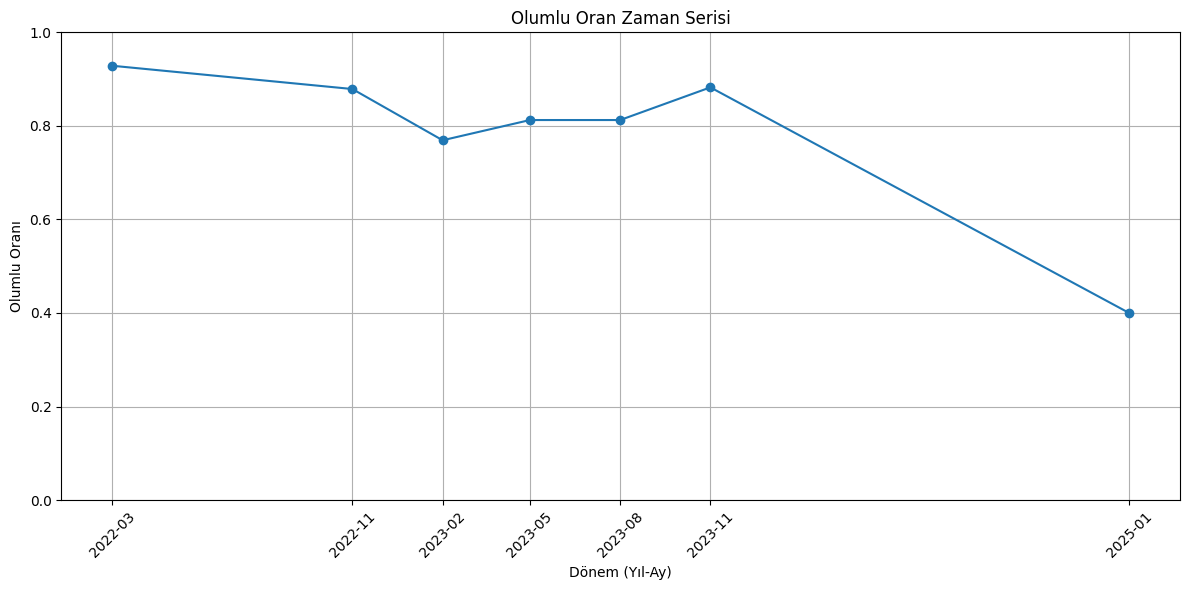

In [ ]:
df_urun = df_merged[df_merged['Ürün Adı']=='TRENDYOLMİLLA Siyah Kemerli Mini Dokuma Ceket Elbise TWOAW22EL0243']

df_urun['Yıl_Ay_Min_dt'] = pd.to_datetime(df_urun['Yıl_Ay_Min'], format='%Y-%m')
df_urun['Yıl_Ay_Max_dt'] = pd.to_datetime(df_urun['Yıl_Ay_Max'], format='%Y-%m')

x_dates = df_urun['Yıl_Ay_Min_dt'].tolist()
x_dates[-1] = df_urun['Yıl_Ay_Max_dt'].iloc[-1]

plt.figure(figsize=(12,6))
plt.plot(x_dates, df_urun['Olumlu Oranı'], marker='o')

plt.ylim(0, 1)
plt.title("Olumlu Oran Zaman Serisi")
plt.xlabel("Dönem (Yıl-Ay)")
plt.ylabel("Olumlu Oranı")

plt.grid(True)

labels = df_urun['Yıl_Ay_Min'].tolist()
labels[-1] = df_urun['Yıl_Ay_Max'].iloc[-1]

plt.xticks(x_dates, labels, rotation=45)

plt.tight_layout()
plt.show()


İlk 25 Ürüne Göz Atmak

In [ ]:
def plot_olumlu_oran(df, urun_adi):
    df_urun = df[df['Ürün Adı'] == urun_adi].copy()

    df_urun['Yıl_Ay_Min_dt'] = pd.to_datetime(df_urun['Yıl_Ay_Min'], format='%Y-%m')
    df_urun['Yıl_Ay_Max_dt'] = pd.to_datetime(df_urun['Yıl_Ay_Max'], format='%Y-%m')

    x_dates = df_urun['Yıl_Ay_Min_dt'].tolist()
    x_dates[-1] = df_urun['Yıl_Ay_Max_dt'].iloc[-1]

    plt.figure(figsize=(12,6))
    plt.plot(x_dates, df_urun['Olumlu Oranı'], marker='o')

    plt.ylim(0, 1)
    plt.title(f"Olumlu Oran Zaman Serisi - {urun_adi}")
    plt.xlabel("Dönem (Yıl-Ay)")
    plt.ylabel("Olumlu Oranı")
    plt.grid(True)

    labels = df_urun['Yıl_Ay_Min'].tolist()
    labels[-1] = df_urun['Yıl_Ay_Max'].iloc[-1]

    plt.xticks(x_dates, labels, rotation=45)
    plt.tight_layout()
    plt.show()


In [26]:
df_trend_diff.head(25)

,Ürün Adı,İlk Dönem,Son Dönem,İlk Skor,Son Skor,Değişim,Mutlak_Değişim
291,TRENDYOLMİLLA Siyah Kemerli Mini Dokuma Ceket Elbise TWOAW22EL0243,2022-03,2025-01,0.928571,0.400000,-0.528571,0.528571
461,Trendyol Curve Mavi Dokuma Beli Lastik ve Düğme Detaylı Elbise TBBSS22EL1563,2023-01,2025-01,0.333333,0.833333,0.500000,0.500000
451,Trendyol Curve Kahverengi Büzgü Detaylı Midi Örme Elbise TBBSS24AH00080,2024-03,2025-03,0.400000,0.884615,0.484615,0.484615
24,TRENDYOLMİLLA Beyaz Skater/Belden Açılan Brode Mini Astarlı Dokuma Elbise TWOSS21EL3680,2022-03,2024-10,0.920000,0.500000,-0.420000,0.420000
13,TRENDYOLMİLLA Beyaz A Kesim Yaka Detaylı Brode Mini Astarlı Dokuma Elbise TWOSS21EL2089,2022-04,2025-03,0.948718,0.533333,-0.415385,0.415385
417,TRENDYOLMİLLA Çok Renkli Ayarlanabilir Askılı Baskılı Askılı Bürümcük/Dokulu Örme Midi Elbise TWOSS24EL00401,2024-02,2025-02,1.000000,0.588235,-0.411765,0.411765
313,TRENDYOLMİLLA Siyah Mini Triko Pileli Etek Detaylı Elbise TWOAW24EL00013,2023-08,2025-03,0.848485,0.454545,-0.393939,0.393939
272,TRENDYOLMİLLA Siyah Eteği Volanlı A Kesim Şifon Midi Astarlı Dokuma Elbise TWOSS22EL00733,2022-05,2024-08,0.975000,0.600000,-0.375000,0.375000
74,TRENDYOLMİLLA Haki Gömlek Yaka Dokuma Elbise TWOAW21EL1964,2022-03,2025-02,0.863636,0.500000,-0.363636,0.363636
19,TRENDYOLMİLLA Beyaz Dokuma %100 Pamuk Mini Plaj Elbisesi TBESS21EL3979,2022-03,2025-02,0.944444,0.595238,-0.349206,0.349206


In [27]:
df = df_trend_diff.head(25)
urunler = df["Ürün Adı"]

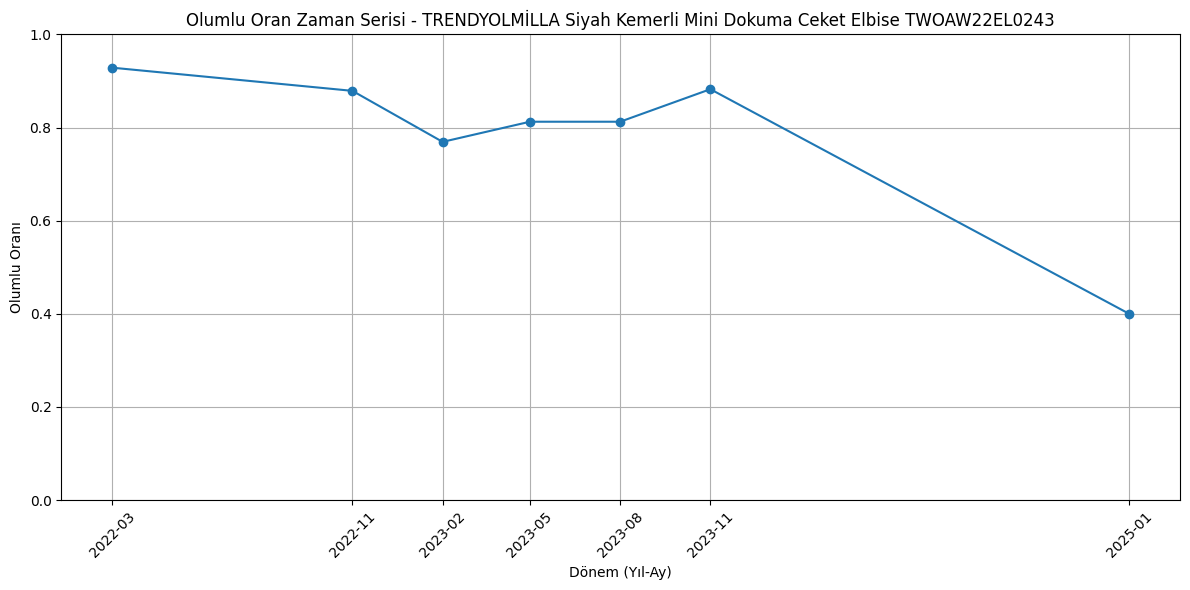

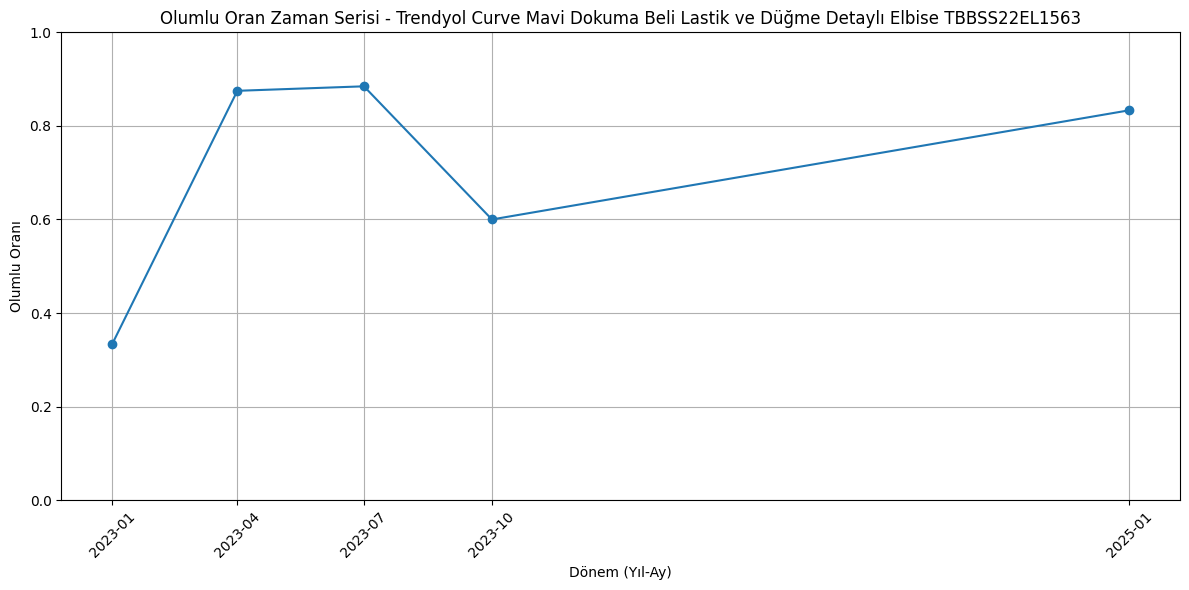

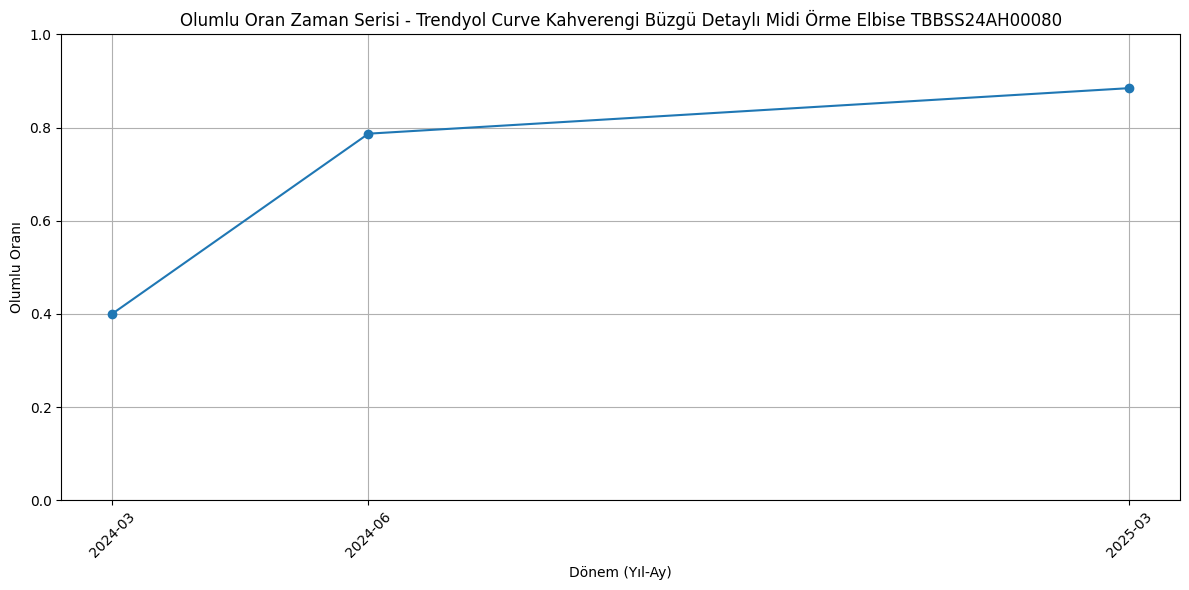

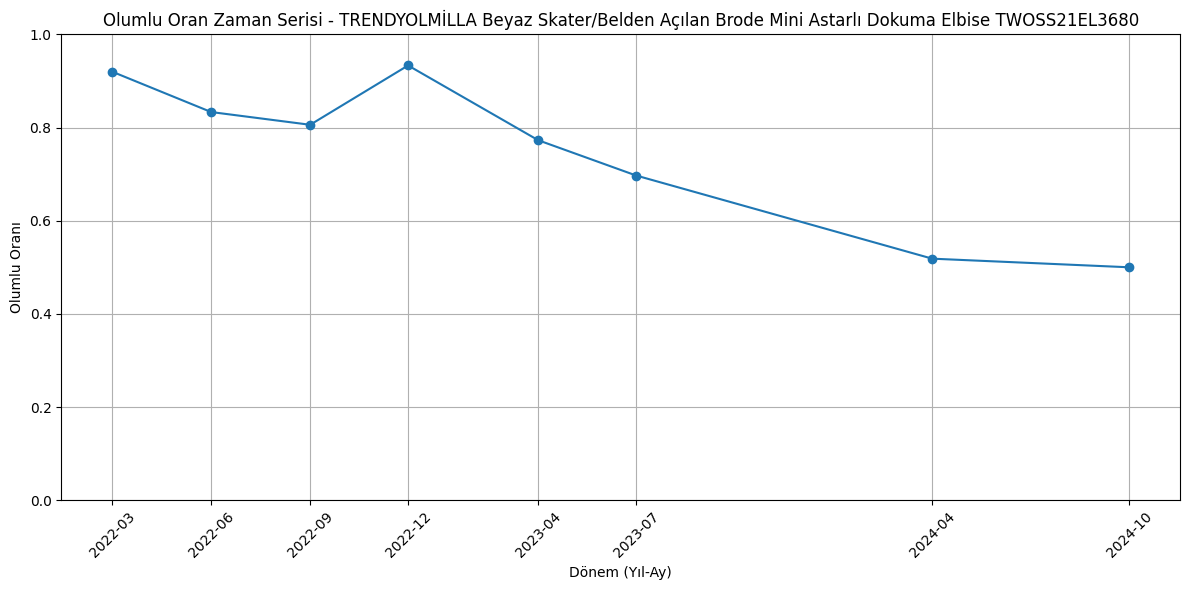

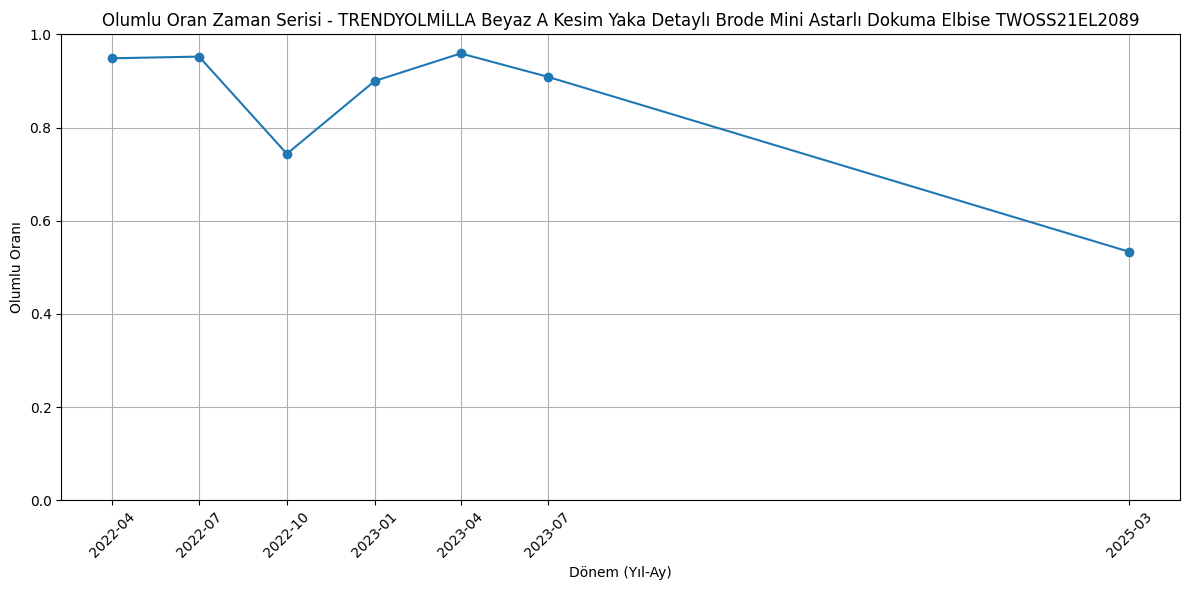

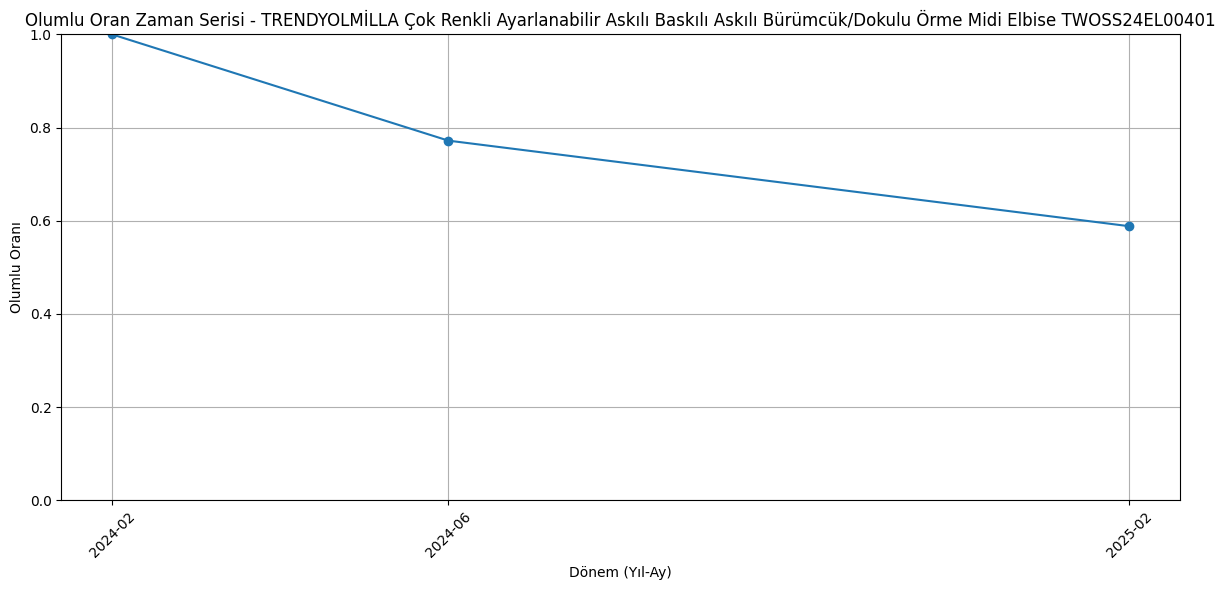

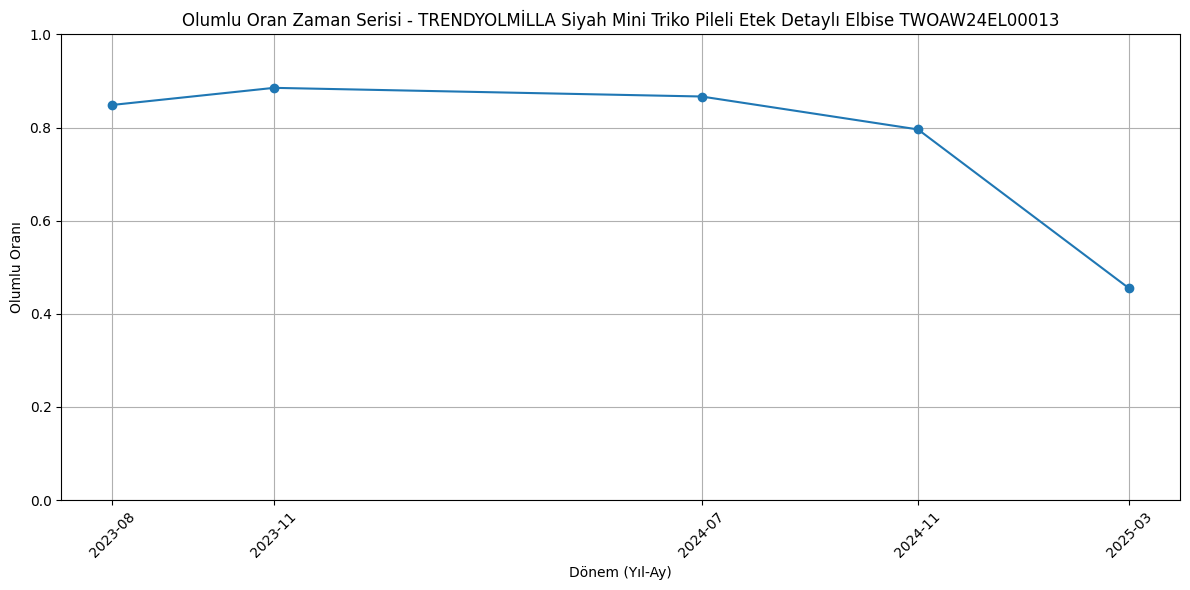

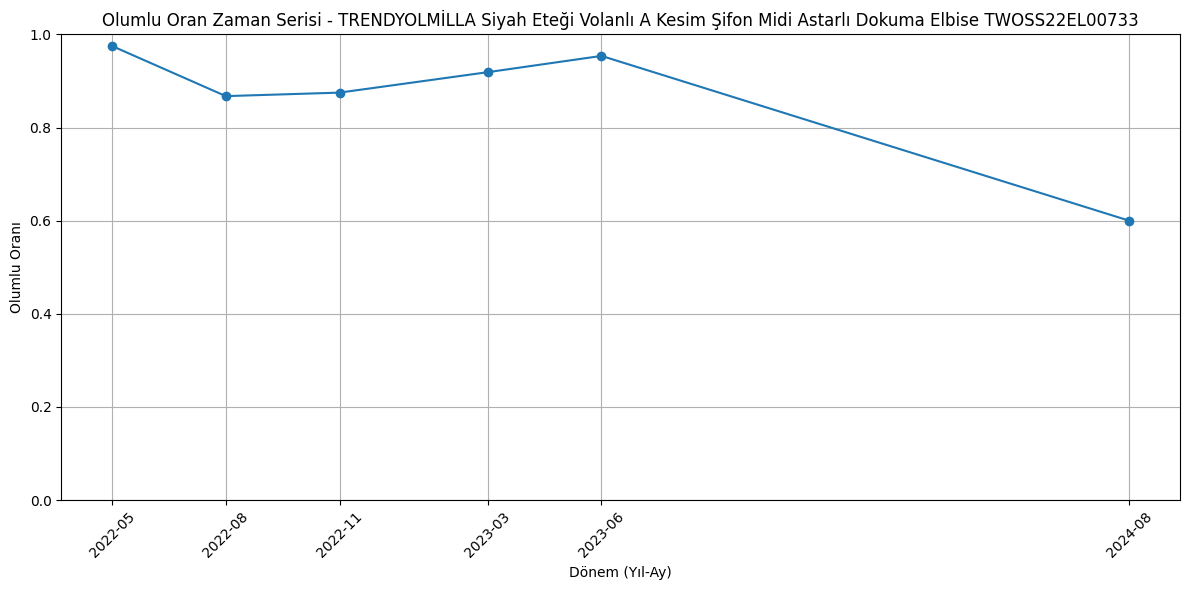

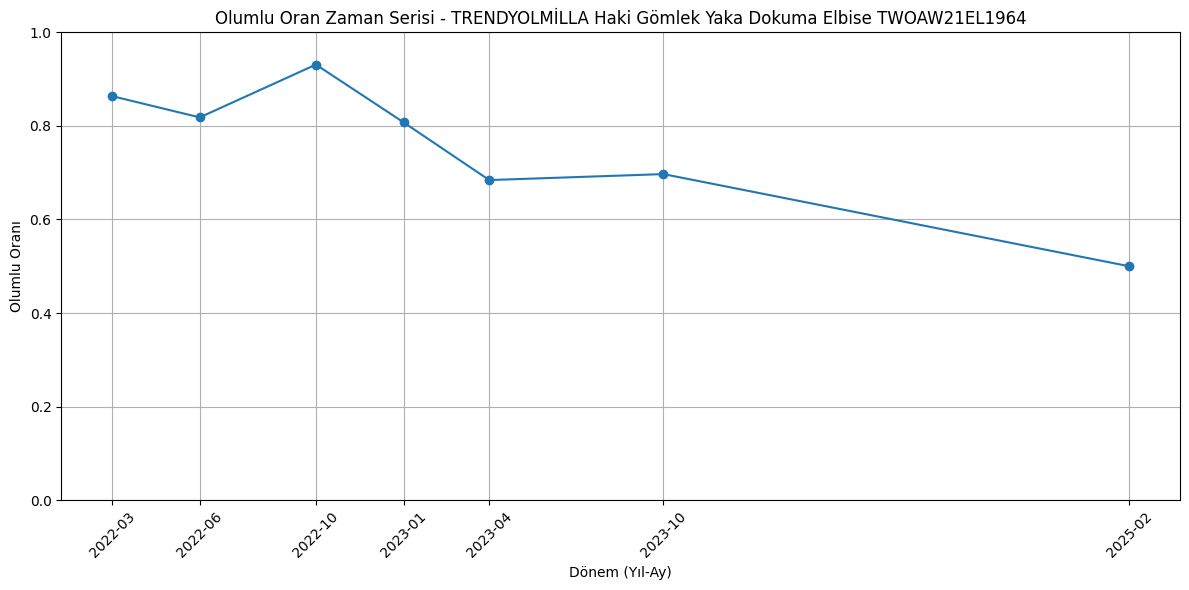

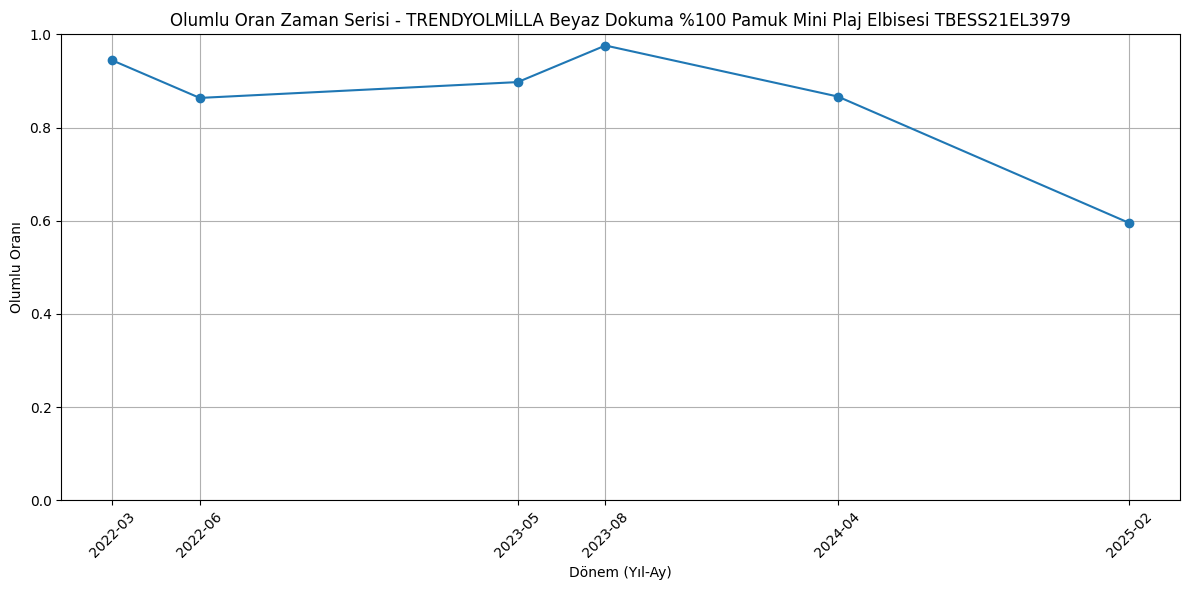

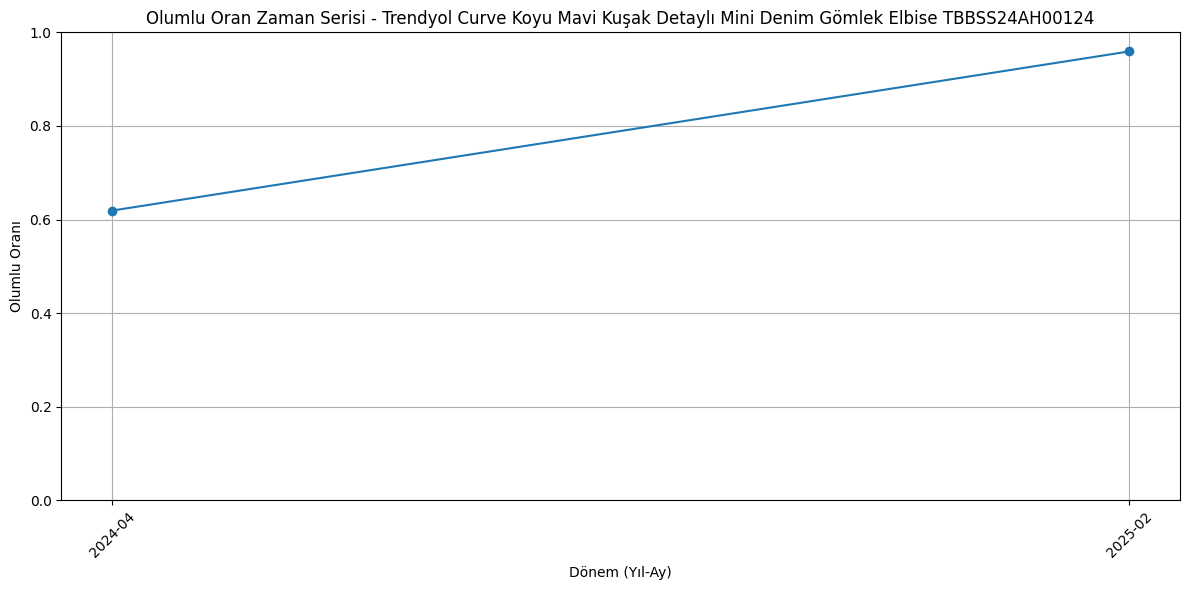

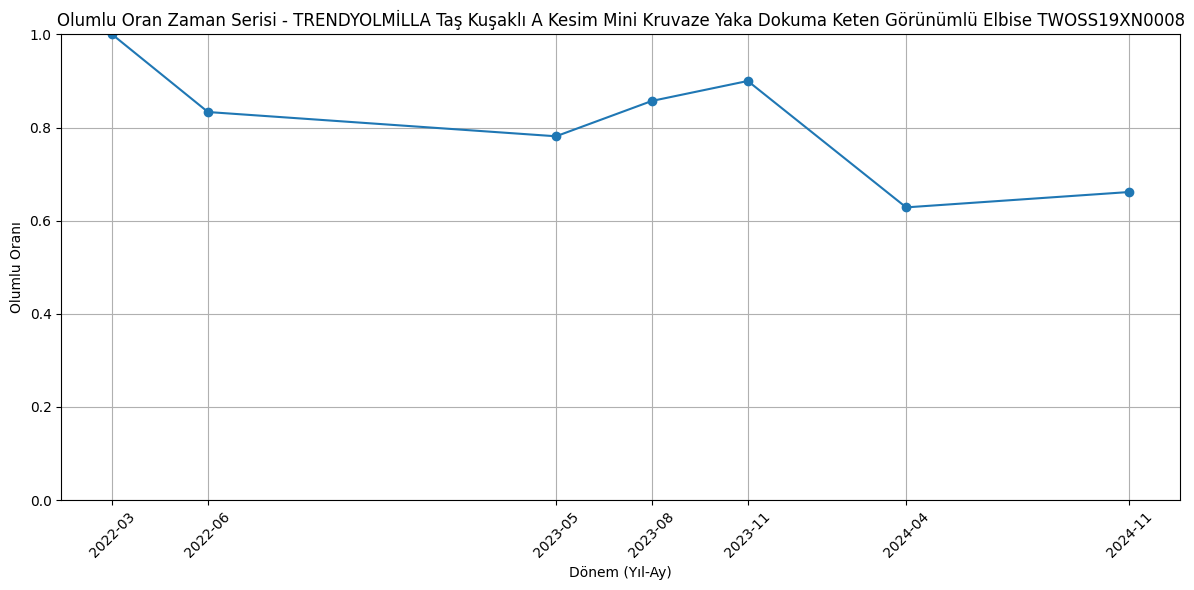

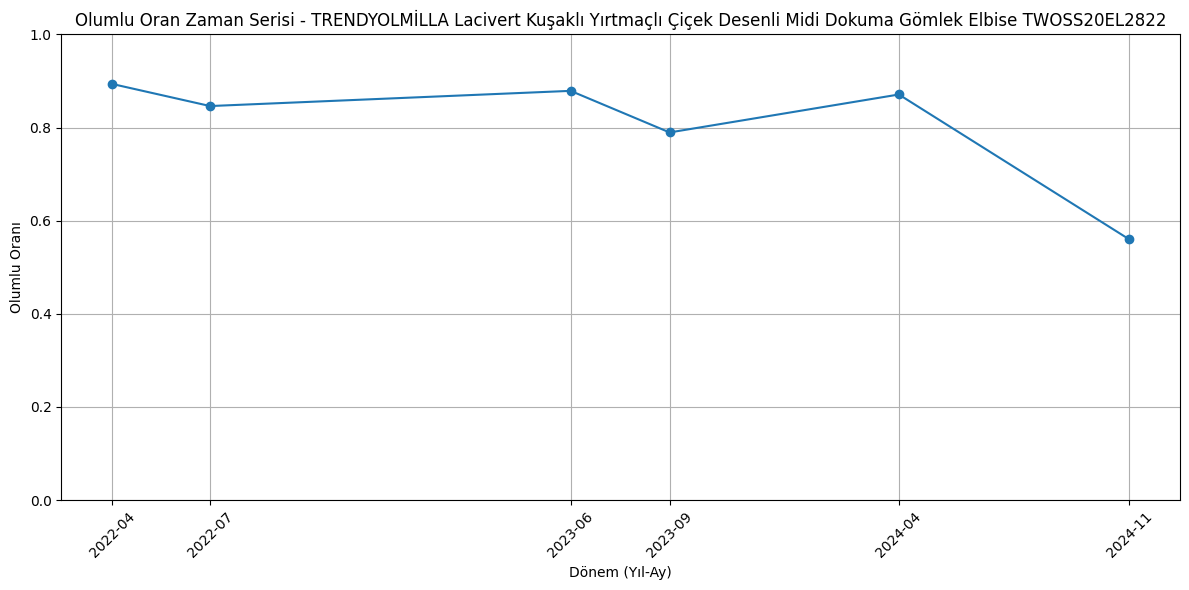

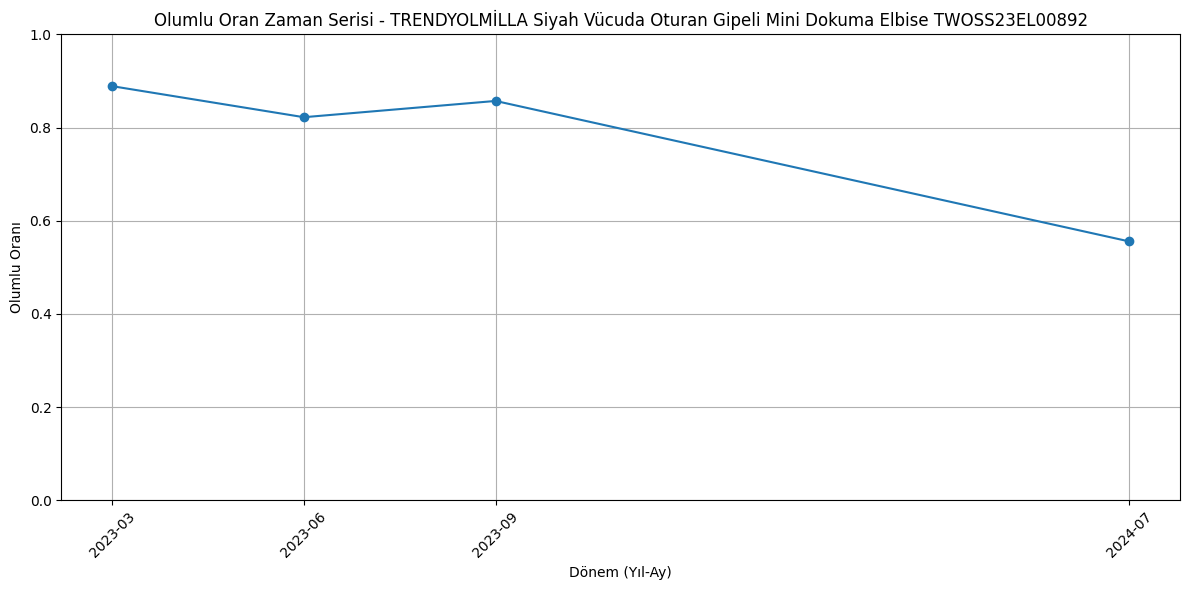

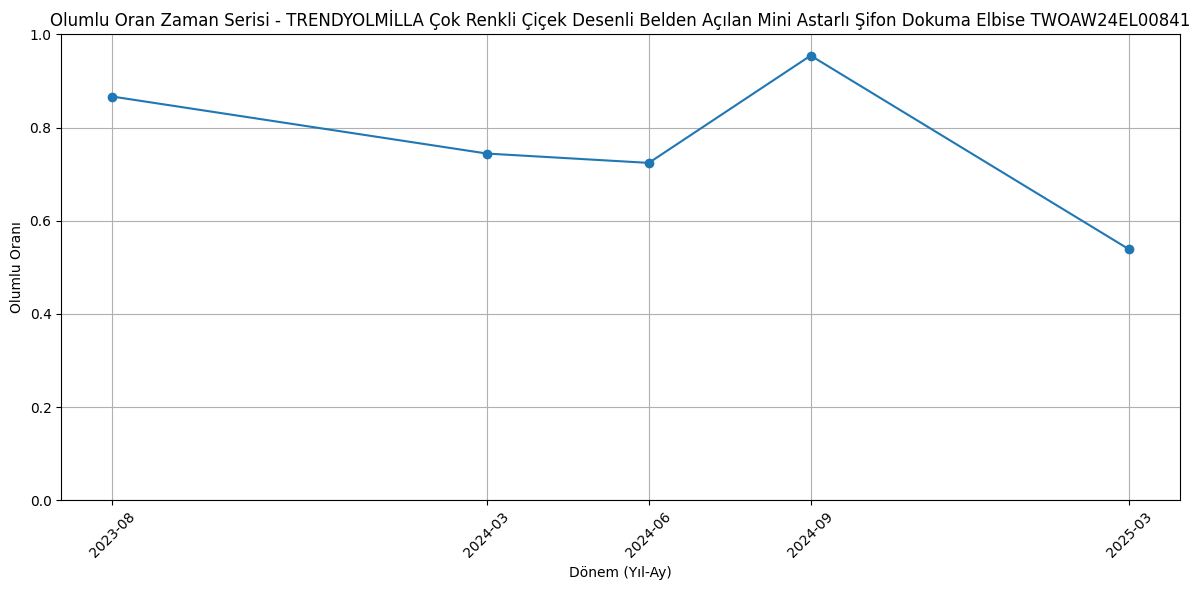

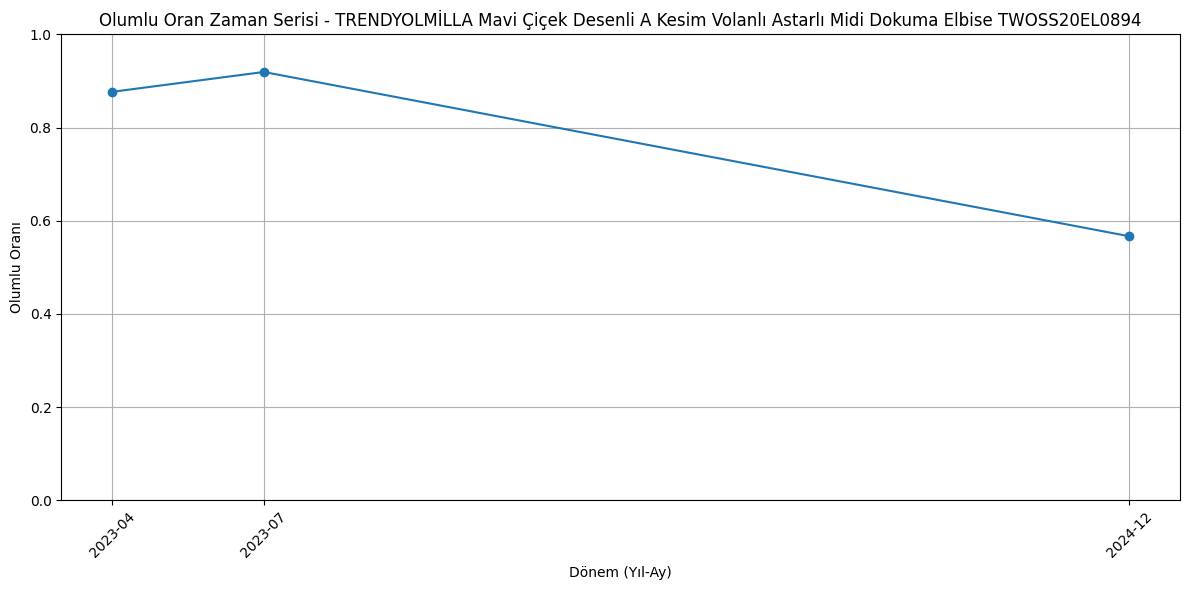

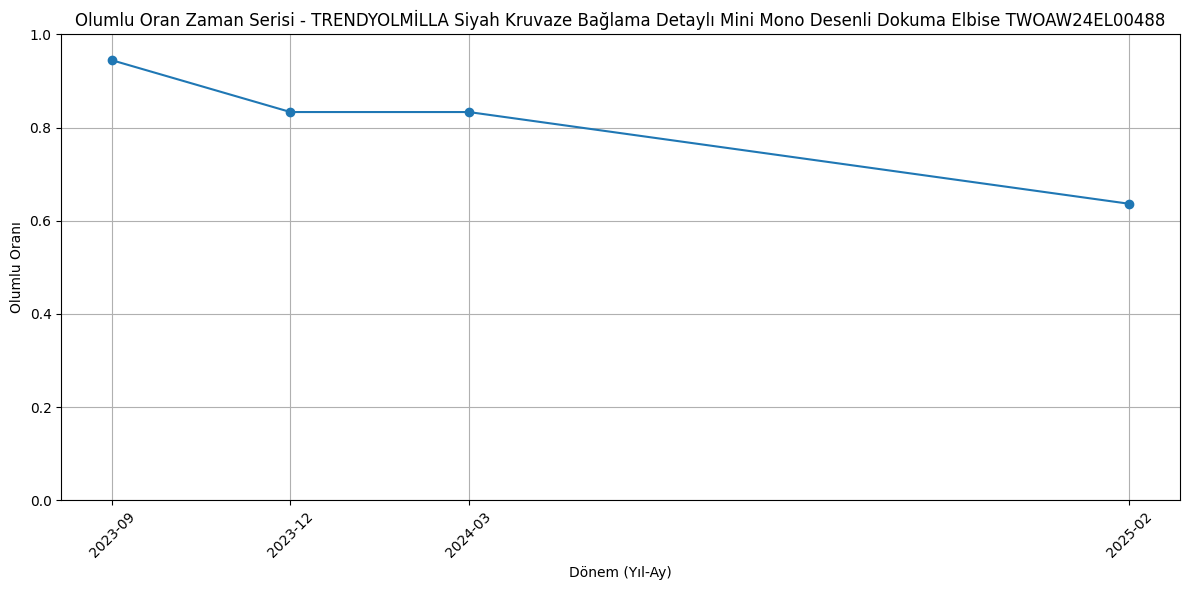

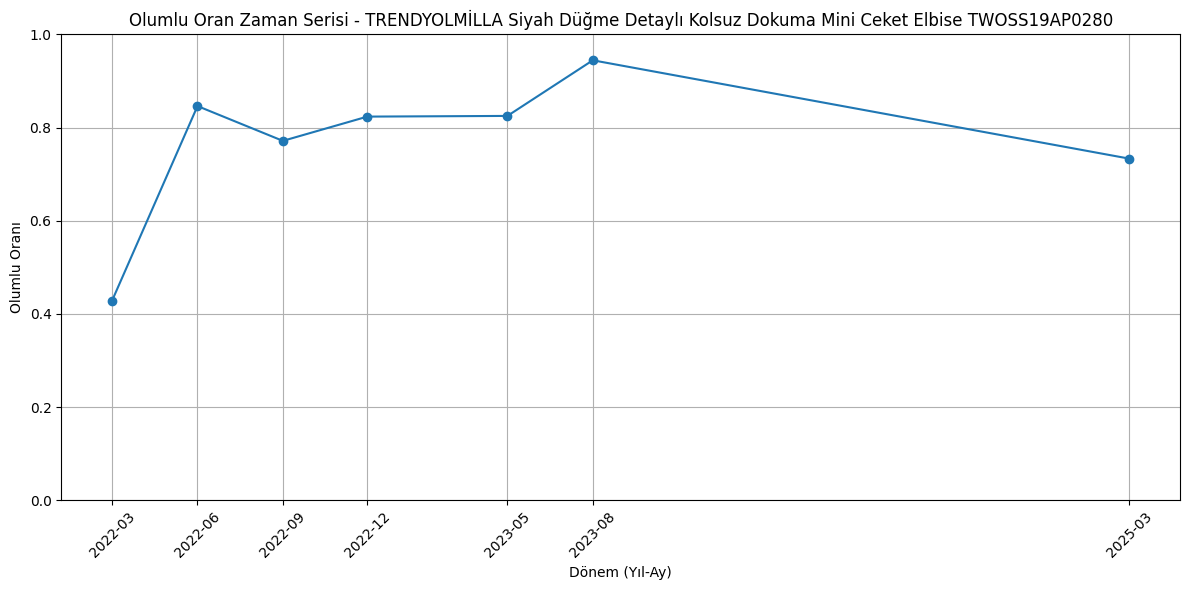

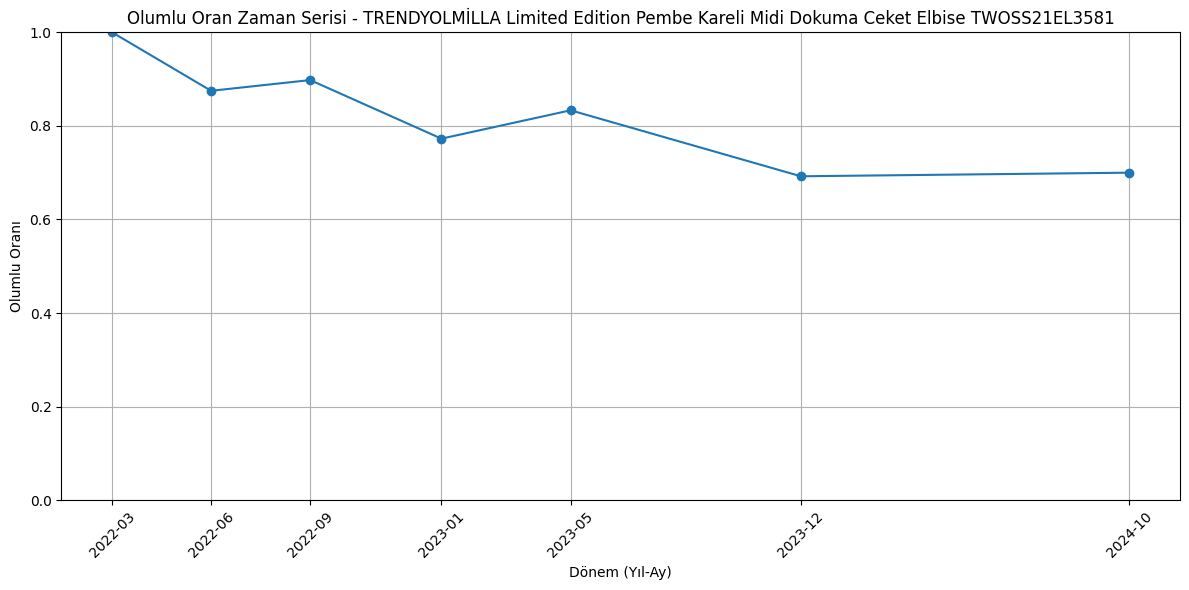

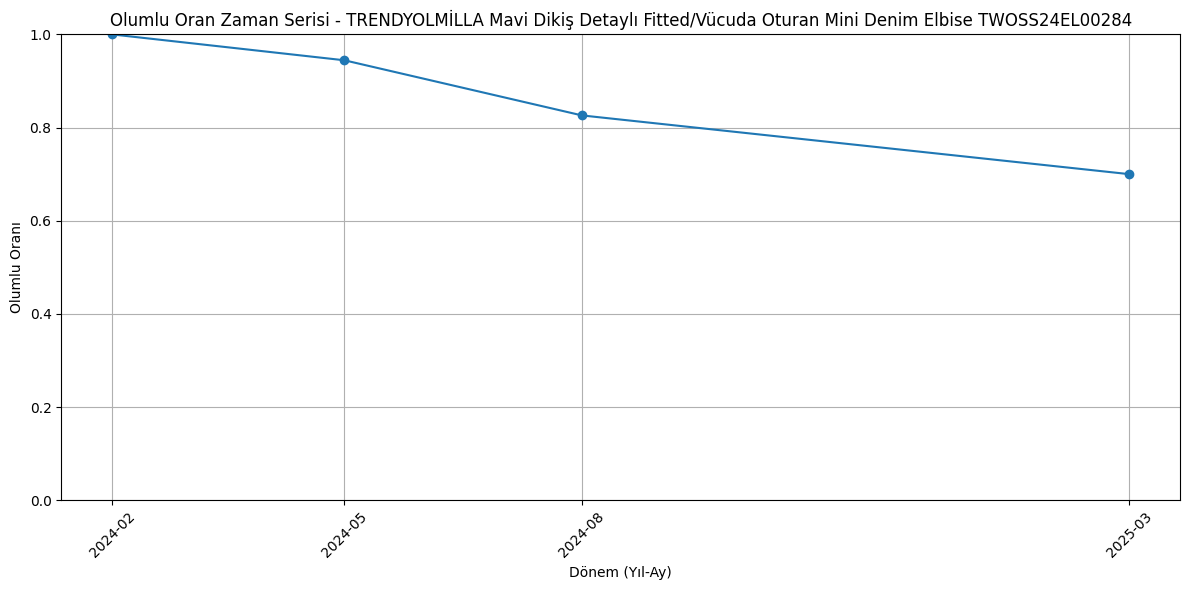

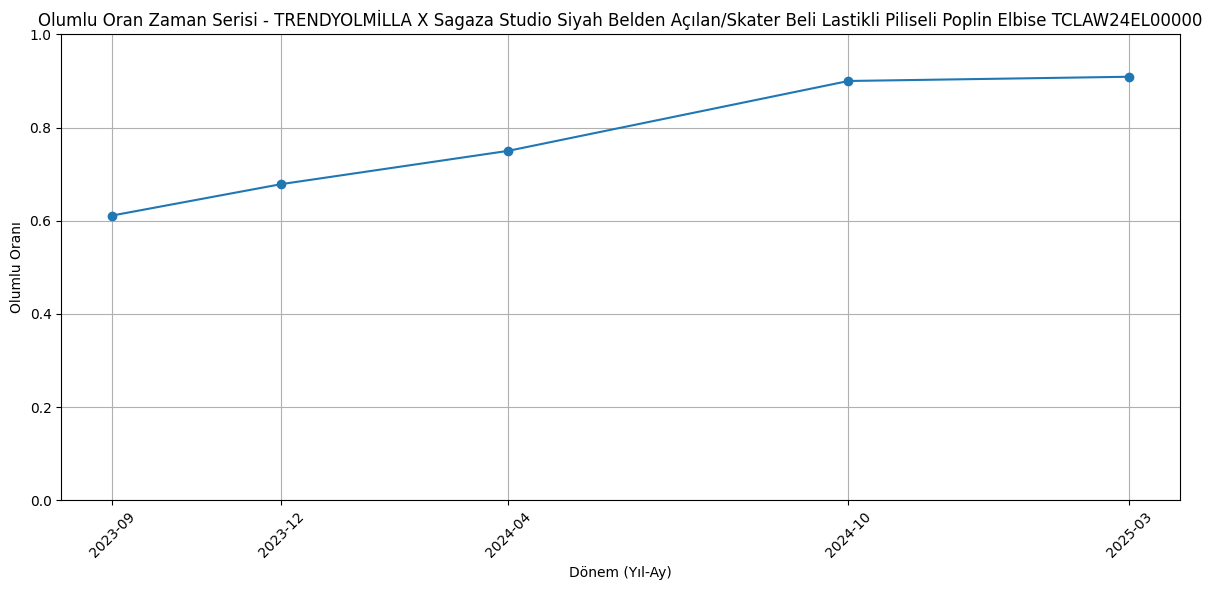

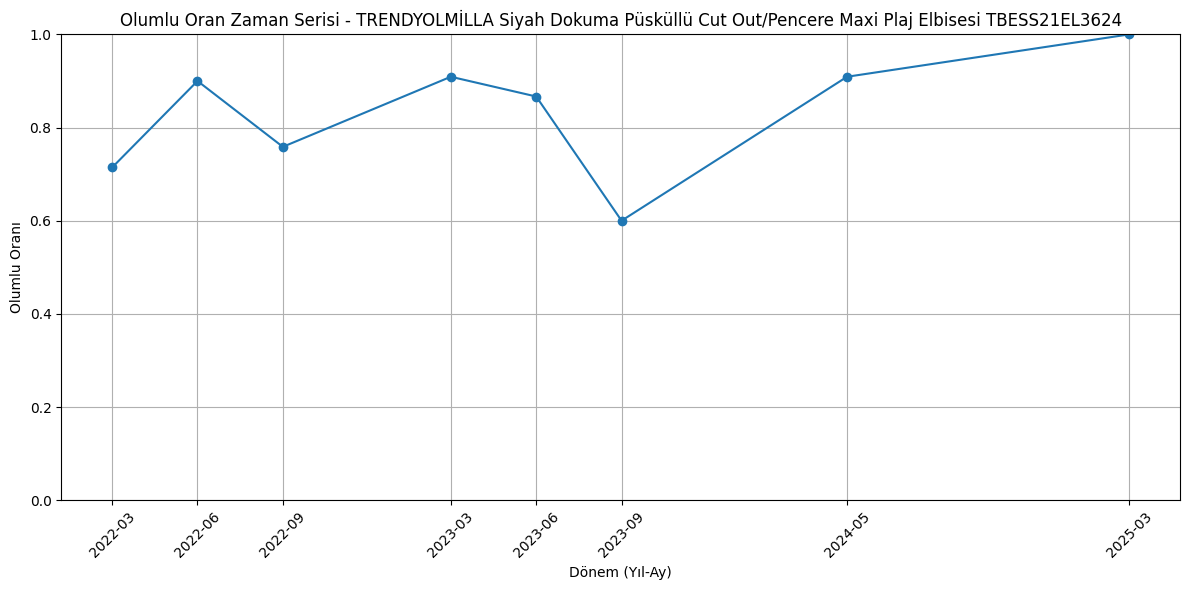

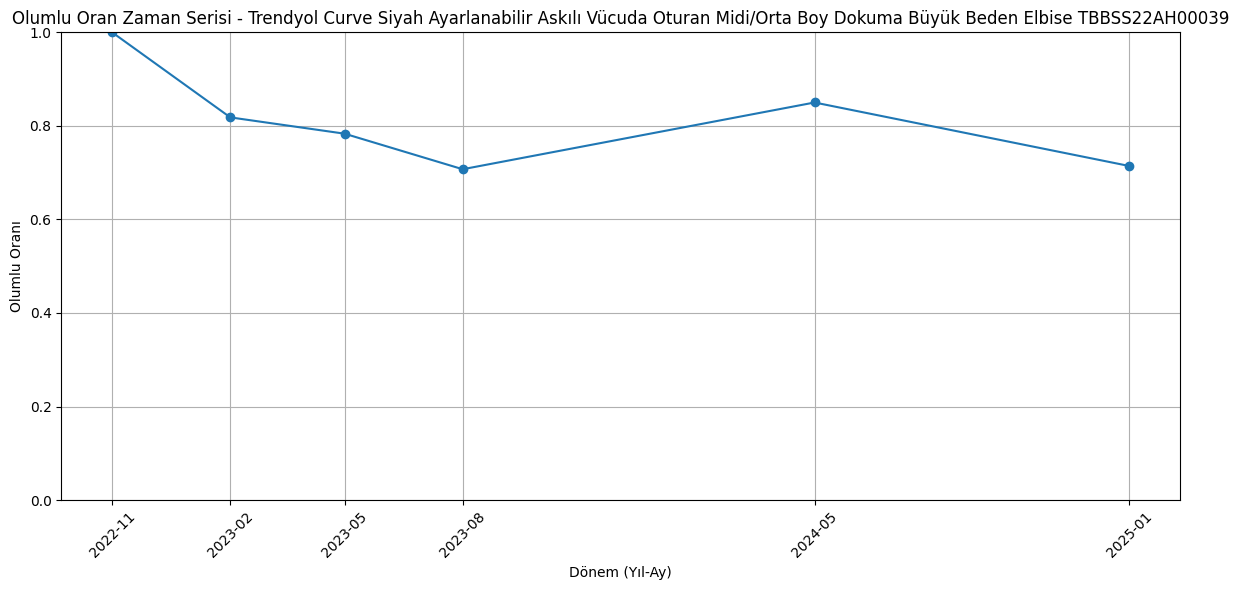

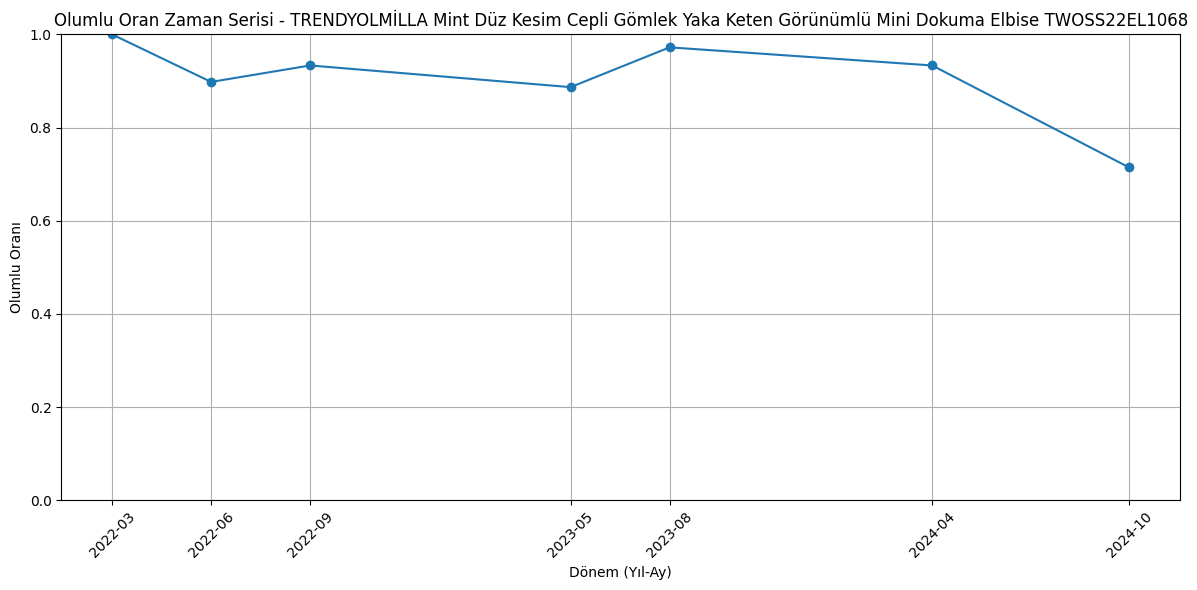

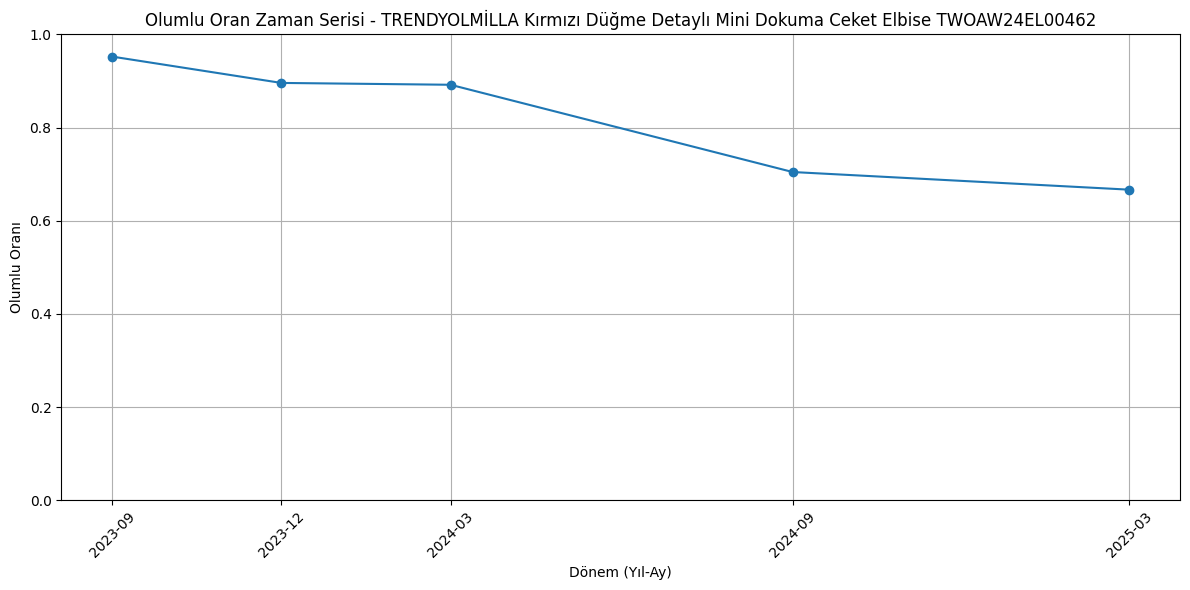

In [29]:
for urun in urunler:
    plot_olumlu_oran(df_merged, urun)

In [30]:
df_merged.head()

,Ürün Adı,Yıl_Ay_Min,Yıl_Ay_Max,Olumlu Yorum Sayısı,Toplam Yorum Sayısı,Olumlu Oranı
0,Edit by Trendyol Siyah Vücuda Oturan Asimetrik Yaka Örme Kısa Elbise TEDAW25EL00006,2024-08,2024-10,9,13,0.692308
1,Edit by Trendyol Siyah Vücuda Oturan Asimetrik Yaka Örme Kısa Elbise TEDAW25EL00006,2024-11,2025-01,44,62,0.709677
2,Edit by Trendyol Siyah Vücuda Oturan Asimetrik Yaka Örme Kısa Elbise TEDAW25EL00006,2025-02,2025-03,9,15,0.600000
3,TRENDYOLMİLLA Altın Vücuda Oturan Parıltılı Örme Pullu Payet Kısa Şık Abiye Elbise TPRAW24EL00159,2023-09,2024-02,33,37,0.891892
4,TRENDYOLMİLLA Altın Vücuda Oturan Parıltılı Örme Pullu Payet Kısa Şık Abiye Elbise TPRAW24EL00159,2024-03,2024-09,10,12,0.833333


In [ ]:
comment_path = os.path.join(os.path.expanduser("~"), "Desktop\\TrendyolMilla\\04_Data_Time_Series\\Data")
file_name = "product_adjusted_periodic_sentiment.csv"
file_path = os.path.join(comment_path, file_name)
df_merged.to_csv(file_path, index=False)  
print(f"{file_name} olarak kaydedildi.") 

product_adjusted_periodic_sentiment.csv olarak kaydedildi.


In [32]:
df_trend_diff.head()

,Ürün Adı,İlk Dönem,Son Dönem,İlk Skor,Son Skor,Değişim,Mutlak_Değişim
291,TRENDYOLMİLLA Siyah Kemerli Mini Dokuma Ceket Elbise TWOAW22EL0243,2022-03,2025-01,0.928571,0.400000,-0.528571,0.528571
461,Trendyol Curve Mavi Dokuma Beli Lastik ve Düğme Detaylı Elbise TBBSS22EL1563,2023-01,2025-01,0.333333,0.833333,0.500000,0.500000
451,Trendyol Curve Kahverengi Büzgü Detaylı Midi Örme Elbise TBBSS24AH00080,2024-03,2025-03,0.400000,0.884615,0.484615,0.484615
24,TRENDYOLMİLLA Beyaz Skater/Belden Açılan Brode Mini Astarlı Dokuma Elbise TWOSS21EL3680,2022-03,2024-10,0.920000,0.500000,-0.420000,0.420000
13,TRENDYOLMİLLA Beyaz A Kesim Yaka Detaylı Brode Mini Astarlı Dokuma Elbise TWOSS21EL2089,2022-04,2025-03,0.948718,0.533333,-0.415385,0.415385


In [ ]:
comment_path = os.path.join(os.path.expanduser("~"), "Desktop\\TrendyolMilla\\04_Data_Time_Series\\Data")
file_name = "product_trend_diff.csv"
file_path = os.path.join(comment_path, file_name)
df_trend_diff.to_csv(file_path, index=False)  
print(f"{file_name} olarak kaydedildi.") 

product_trend_diff.csv olarak kaydedildi.
